### (Previous preparation)

In [ ]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

### Importing packages

In [2]:
from src.helpers import load_experiment_workbench, use_gpu, get_best_weights
from src.utils import get_random_images
from src.models import AutoEncoder
from src.models.autoencoder.modules.encoders.models import SimpleEncoder, ResnetEncoderv1, ResnetEncoderv2
from src.trainer.metrics import psnr, ssim
from src.trainer.losses import ssim as ssim_loss

from tensorflow.keras import layers

%matplotlib inline

### Enabling GPU

In [3]:
use_gpu(True)

1 Physical GPUs, 1 Logical GPUs


### Creating a new workbench

In [4]:
workbench = load_experiment_workbench("architectures_desgined_8fm")

Found 26305 validated image filenames.
Found 26305 validated image filenames.
Found 5573 validated image filenames.
Found 5573 validated image filenames.
Found 8039 validated image filenames.
Found 8039 validated image filenames.


### Define metrics

In [5]:
metrics = [
    "mean_squared_error",
    psnr,
    ssim
]

## Loading models with their best weights

### Autoencoder

#### Loss function: MSE

In [6]:
ae_mse_model = AutoEncoder(
    encoder=SimpleEncoder(depth=4, feature_maps=8),
    name="Autoencoder",
)(input_shape=workbench.image_shape)
ae_mse_model.compile(loss='mean_squared_error', optimizer = 'adam', metrics=metrics)
ae_mse_model.load_weights(
    filepath=str(get_best_weights(results_path=workbench.results_path/"ae_mse"))
)

#### Loss function: SSIM

In [7]:
ae_ssim_model = AutoEncoder(
    encoder=SimpleEncoder(depth=4, feature_maps=8),
    name="Autoencoder",
)(input_shape=workbench.image_shape)
ae_ssim_model.compile(loss=ssim_loss, optimizer = 'adam', metrics=metrics)
ae_ssim_model.load_weights(
    filepath=str(get_best_weights(results_path=workbench.results_path/"ae_ssim"))
)

### AE + Skippend Long Connections (AE+sLC)

#### Loss function: MSE

In [8]:
ae_slc_mse_model = AutoEncoder(
    encoder=SimpleEncoder(depth=4, feature_maps=8),
    name="AE + sLC",
    skip_long_connections_function=layers.add
)(input_shape=workbench.image_shape)
ae_slc_mse_model.compile(loss='mean_squared_error', optimizer = 'adam', metrics=metrics)
ae_slc_mse_model.load_weights(
    filepath=str(get_best_weights(results_path=workbench.results_path/"ae_slc_mse"))
)

#### Loss function: SSIM

In [9]:
ae_slc_ssim_model = AutoEncoder(
    encoder=SimpleEncoder(depth=4, feature_maps=8),
    name="AE + sLC",
    skip_long_connections_function=layers.add
)(input_shape=workbench.image_shape)
ae_slc_ssim_model.compile(loss=ssim_loss, optimizer = 'adam', metrics=metrics)
ae_slc_ssim_model.load_weights(
    filepath=str(get_best_weights(results_path=workbench.results_path/"ae_slc_ssim"))
)

### AE + Residual block (RB)

#### Loss function: MSE

In [10]:
ae_rb_mse_model = AutoEncoder(
    encoder=ResnetEncoderv1(nb_list=[3,4,2], feature_maps=8),
    name="AE + RB",
)(input_shape=workbench.image_shape)
ae_rb_mse_model.compile(loss='mean_squared_error', optimizer = 'adam', metrics=metrics)
ae_rb_mse_model.load_weights(
    filepath=str(get_best_weights(results_path=workbench.results_path/"ae_rb_mse"))
)

#### Loss function: SSIM

In [11]:
ae_rb_ssim_model = AutoEncoder(
    encoder=ResnetEncoderv1(nb_list=[3,4,2], feature_maps=8),
    name="AE + RB",
)(input_shape=workbench.image_shape)
ae_rb_ssim_model.compile(loss=ssim_loss, optimizer = 'adam', metrics=metrics)
ae_rb_ssim_model.load_weights(
    filepath=str(get_best_weights(results_path=workbench.results_path/"ae_rb_ssim"))
)

### AE + sLC + RB (v1)

#### Loss function: MSE

In [12]:
ae_slc_rb_mse_model_v1 = AutoEncoder(
    encoder=ResnetEncoderv1(nb_list=[3,4,2], feature_maps=8),
    name="AE + sLC + RB (v1)",
    skip_long_connections_function=layers.add
)(input_shape=workbench.image_shape)
ae_slc_rb_mse_model_v1.compile(loss='mean_squared_error', optimizer = 'adam', metrics=metrics)
ae_slc_rb_mse_model_v1.load_weights(
    filepath=str(get_best_weights(results_path=workbench.results_path/"ae_slc_rb_mse_v1"))
)

#### Loss function: SSIM

In [13]:
ae_slc_rb_ssim_model_v1 = AutoEncoder(
    encoder=ResnetEncoderv1(nb_list=[3,4,2], feature_maps=8),
    name="AE + sLC + RB (v1)",
    skip_long_connections_function=layers.add
)(input_shape=workbench.image_shape)
ae_slc_rb_ssim_model_v1.compile(loss=ssim_loss, optimizer = 'adam', metrics=metrics)
ae_slc_rb_ssim_model_v1.load_weights(
    filepath=str(get_best_weights(results_path=workbench.results_path/"ae_slc_rb_ssim_v1"))
)

### AE + sLC + RB (v2)

#### Loss function: MSE

In [14]:
ae_slc_rb_mse_model_v2 = AutoEncoder(
    encoder=ResnetEncoderv2(nb_list=[3,4,2], feature_maps=8),
    name="AE + sLC + RB (v2)",
    skip_long_connections_function=layers.add
)(input_shape=workbench.image_shape)
ae_slc_rb_mse_model_v2.compile(loss='mean_squared_error', optimizer = 'adam', metrics=metrics)
ae_slc_rb_mse_model_v2.load_weights(
    filepath=str(get_best_weights(results_path=workbench.results_path/"ae_slc_rb_mse_v2"))
)

#### Loss function: SSIM

In [15]:
ae_slc_rb_ssim_model_v2 = AutoEncoder(
    encoder=ResnetEncoderv2(nb_list=[3,4,2], feature_maps=8),
    name="AE + sLC + RB (v2)",
    skip_long_connections_function=layers.add
)(input_shape=workbench.image_shape)
ae_slc_rb_ssim_model_v2.compile(loss=ssim_loss, optimizer = 'adam', metrics=metrics)
ae_slc_rb_ssim_model_v2.load_weights(
    filepath=str(get_best_weights(results_path=workbench.results_path/"ae_slc_rb_ssim_v2"))
)

## Prediction results

In [52]:
images = get_random_images(
    generator=workbench.data_generator.test_generator,
    number=5,
    reset=True
)

### Loss function: MSE

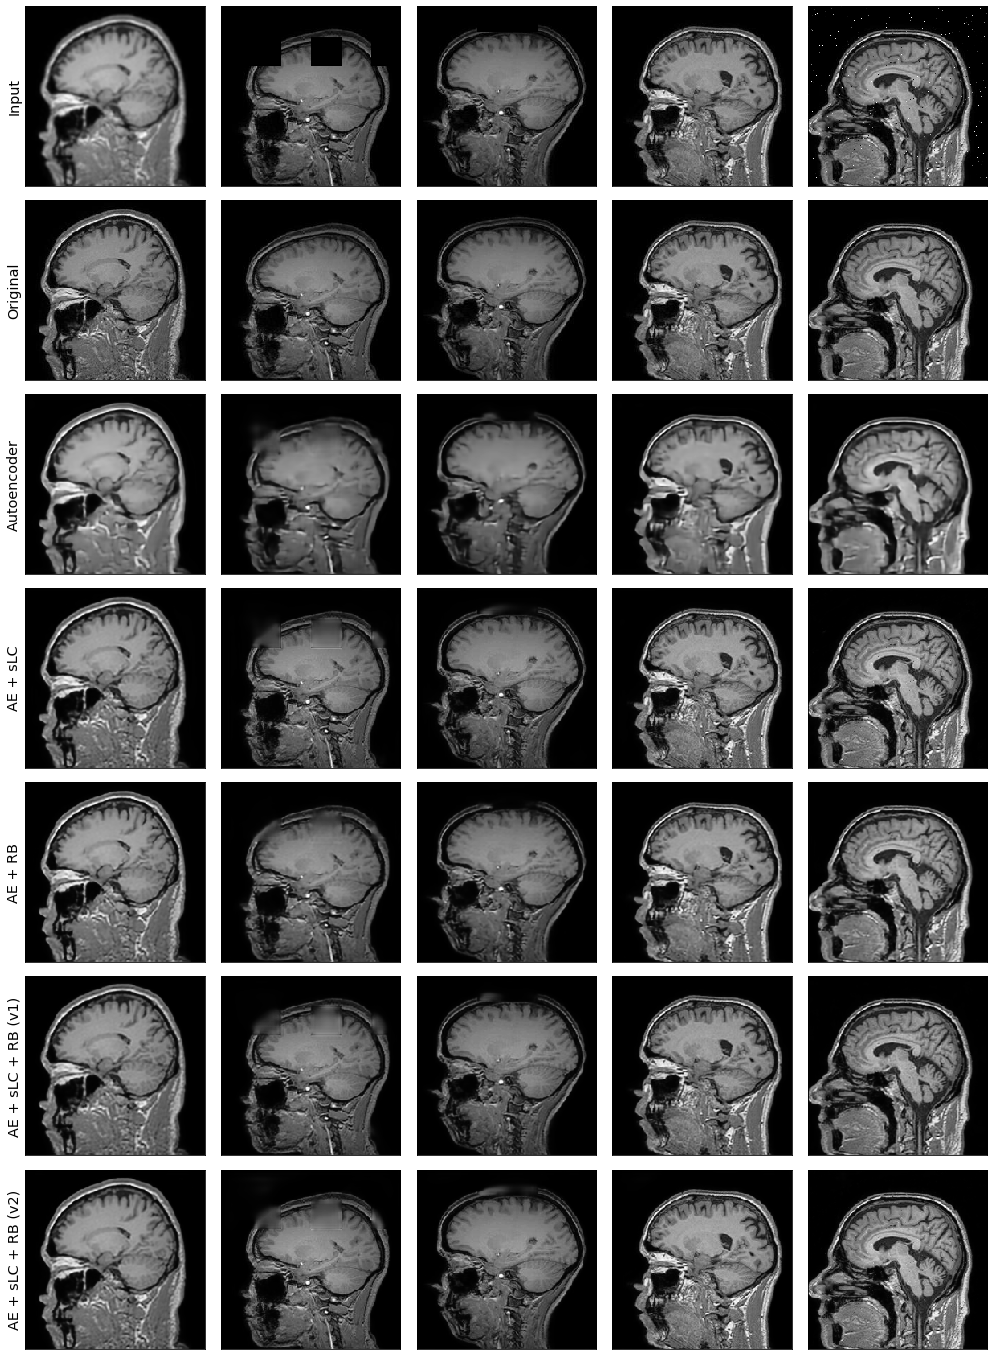

In [53]:
fig_prediction = workbench.compare_model_predictions(
    models=[
        ae_mse_model,
        ae_slc_mse_model,
        ae_rb_mse_model,
        ae_slc_rb_mse_model_v1,
        ae_slc_rb_mse_model_v2
    ],
    images=images
)

In [54]:
fig_prediction.savefig(workbench.results_path/"comparative_mse_models_2.png")

### Loss function: SSIM

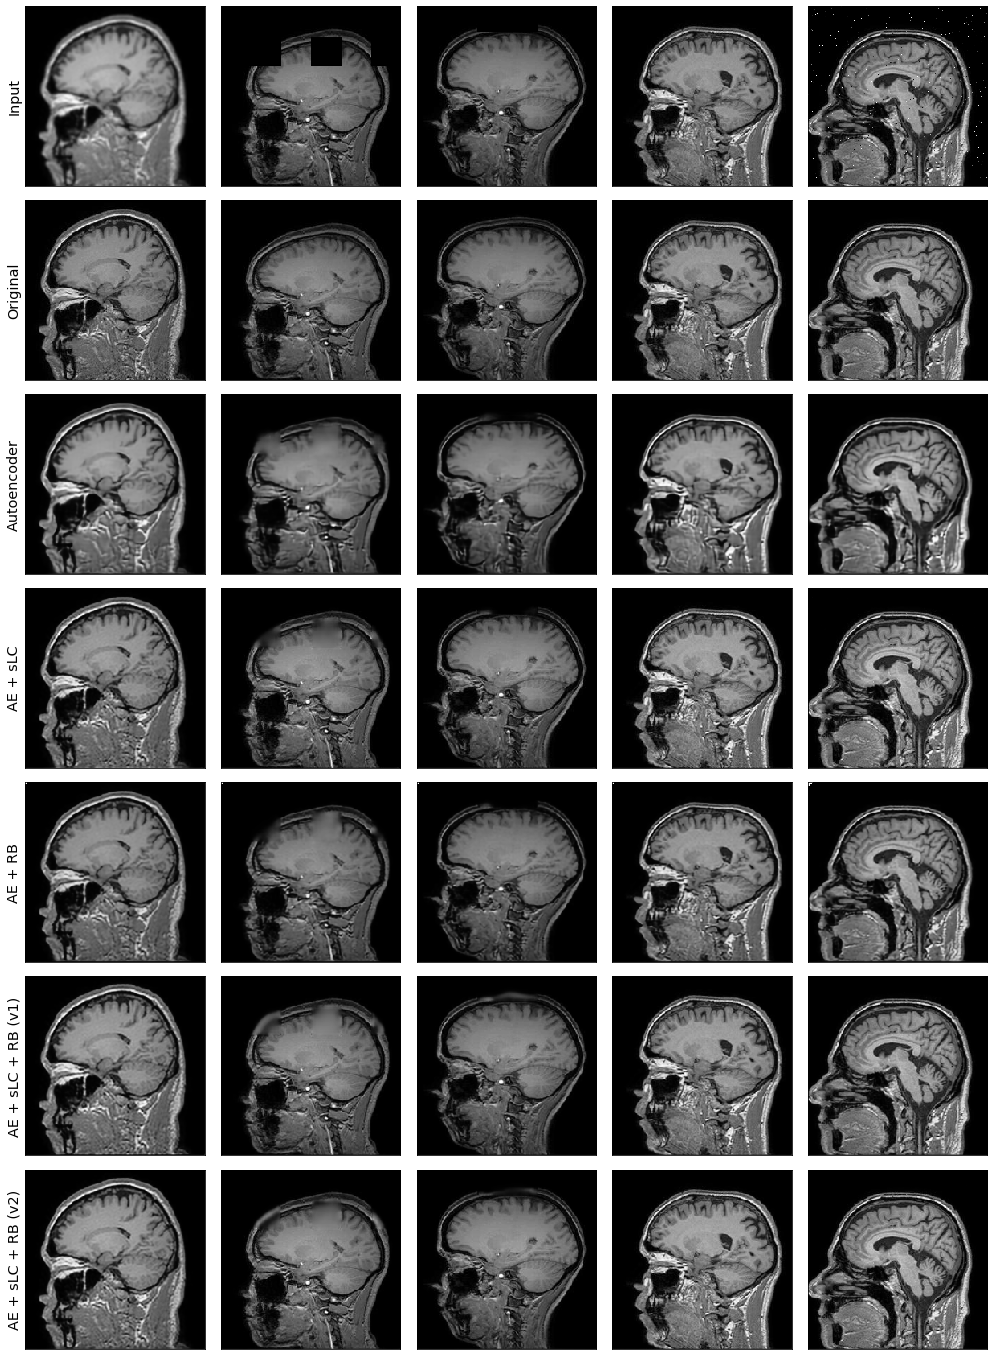

In [55]:
fig_prediction_ssim = workbench.compare_model_predictions(
    models=[
        ae_ssim_model,
        ae_slc_ssim_model,
        ae_rb_ssim_model,
        ae_slc_rb_ssim_model_v1,
        ae_slc_rb_ssim_model_v2
    ],
    images=images
)

In [56]:
fig_prediction_ssim.savefig(workbench.results_path/"comparative_ssim_models_2.png")